In [83]:
import tensorflow as tf
import pandas as pd
import numpy as np 
from tensorflow.keras import layers

import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


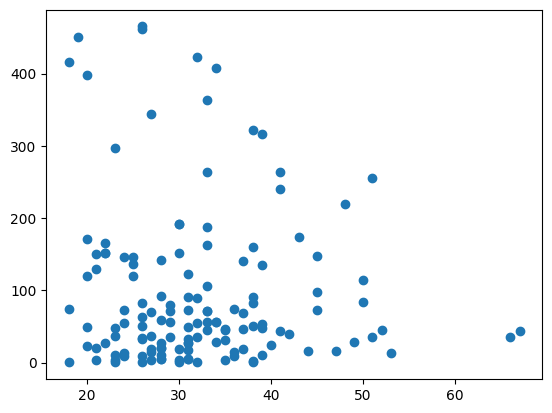

array([4.7000e+00, 8.2720e+01, 9.2180e+01, 1.5210e+02, 2.6610e+01,
       1.0624e+02, 1.4028e+02, 1.9143e+02, 1.9143e+02, 9.0340e+01,
       4.4340e+01, 1.0280e+01, 4.2700e+00, 3.3040e+01, 5.0780e+01,
       4.5000e+01, 9.1260e+01, 7.2200e+01, 8.8900e+01, 2.9600e+00,
       1.3600e+01, 1.4820e+01, 1.4658e+02, 1.6262e+02, 1.5040e+02,
       1.4678e+02, 1.6024e+02, 1.0410e+01, 3.9800e+00, 4.5700e+00,
       1.7156e+02, 7.2040e+01, 7.2040e+01, 5.6200e+00, 2.3420e+01,
       2.5566e+02, 2.4022e+02, 2.6452e+02, 2.6400e+02, 3.1642e+02,
       4.9000e-01, 2.9744e+02, 3.2188e+02, 1.6514e+02, 2.0470e+01,
       2.0470e+01, 3.4382e+02, 3.5200e+00, 3.9816e+02, 1.1972e+02,
       4.0802e+02, 1.4770e+02, 2.2004e+02, 3.6392e+02, 1.1952e+02,
       4.6524e+02, 4.2346e+02, 2.6810e+01, 2.6810e+01, 3.5620e+01,
       4.1656e+02, 1.5164e+02, 1.5164e+02, 4.5086e+02, 4.6144e+02,
       1.2231e+02, 3.0000e-01, 1.7378e+02, 2.8580e+01, 3.9880e+01,
       2.8640e+01, 3.4040e+01, 2.0000e-01, 4.8300e+00, 4.5860e

In [114]:
# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

cancer_type_columns = ["Neoplasm Disease Stage American Joint Committee on Cancer Code", "Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage", "American Joint Committee on Cancer Metastasis Stage Code", "American Joint Committee on Cancer Lymph Node Stage Code.1", "American Joint Committee on Cancer Lymph Node Stage Code", "Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code", "Neoplasm Disease Stage American Joint Committee on Cancer Code.1", "American Joint Committee on Cancer Publication Version Type", "American Joint Committee on Cancer Tumor Stage Code"]

pd_df = pd.read_csv(
    "./Testicular Cancer Dataset.csv",
    # names=[*cancer_type_columns, "Disease Free (Months)"]
    usecols=['Diagnosis Age', 'Disease Free (Months)', 'Disease Free Status']
)

pd_df = pd_df.copy()

pd_df = pd_df.dropna()
# pd_target = pd_df.pop('Disease Free (Months)')

# for diAge, dName in csv_data.iterrows():
#     print(i, diAge, dName)

target = pd_df.apply(lambda p: p.tolist()[1] * (1 if p.tolist()[2] == '1:Recurred/Progressed' else 2), axis=1)

input = np.array(pd_df['Diagnosis Age'].to_frame())
target = np.array(target)

fig, ax = plt.subplots()
ax.plot(input, target, 'o')
plt.show()

target

In [119]:
model = tf.keras.models.Sequential([
#   tf.keras.layers.Normalization().adapt(csv_data),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(1)
])

loss_fn = tf.keras.losses.MeanAbsolutePercentageError() # Denne brukes for regression

model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.005),
    loss=loss_fn,
    # Kommentere ut metrics=accuracy for å få det til å vær regression (predict en kontinuerlig verdi)
    # metrics=['accuracy'] 
)

# predictions = model(csv_data[:1]).numpy()
# predictions

# loss_fn(csv_result[:1], predictions).numpy()

In [124]:
model.fit(input, target, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 96.1458
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 96.1361
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 96.1278
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 96.1195
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 96.1439
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 96.0802
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 96.1171
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 96.2695
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 96.5219
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 96.3345
Epoch 11/100
5/5 [==============================] - 0s 979us/step - loss: 96.0055
Epoch 12/100
5/5 [==============================] - 0s 1ms/step - loss: 96.4927
Epoch 13/100
5/5 [=============================

4/4 [==============================] - 0s 995us/step


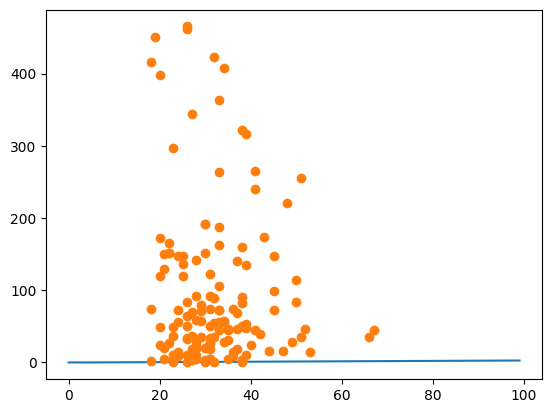

In [125]:
modelResTo100 = model.predict((*range(100),))


fig, ax = plt.subplots()
ax.plot(range(100), modelResTo100)
ax.plot(input, target, 'o')
plt.show()

# modelResTo100
